In [70]:
import numpy as np

In [71]:
import pandas as pd

In [72]:
import matplotlib.pyplot as plt

In [73]:
df = pd.read_excel("data.xls")

Generation functions for the variables

In [74]:
rndGenerator = np.random.default_rng()

def genInitiationTime(e):
    return rndGenerator.exponential(e, 10000)

def genCallDuration(e):
    return rndGenerator.exponential(e, 10000)

def genCarVelocity(e, s):
    return rndGenerator.normal(e, s, 10000)

def genCarPosition():
    return rndGenerator.integers(0, 200001, 10000)

def genBaseStation():
    return rndGenerator.integers(1, 21, 10000)

def genCarDirection():
    return rndGenerator.integers(0, 2, 10000)

Retrieving the arrival timing from the dataset

Calculating the inter-arrival time and drawing the histogram

In [75]:
arrival_timings = df["Arrival time (sec)"].values

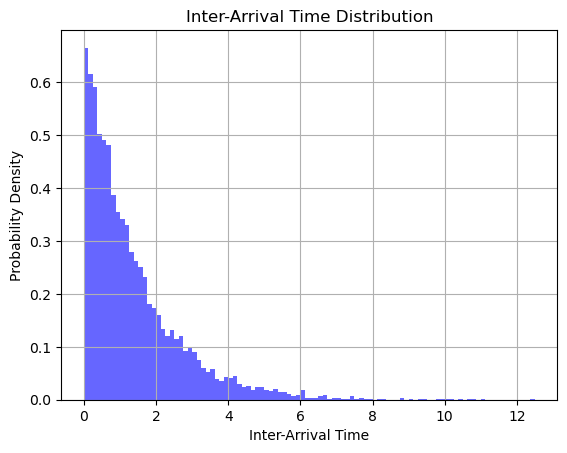

In [76]:
# Calculate inter-arrival times
inter_arrival_times = np.diff(arrival_timings)

# Plot histogram of inter-arrival times
plt.hist(inter_arrival_times, bins=100, density=True, alpha=0.6, color='b')
plt.xlabel('Inter-Arrival Time')
plt.ylabel('Probability Density')
plt.title('Inter-Arrival Time Distribution')
plt.grid(True)
plt.show()

As seen in the graph, the inter-arrival time is in an exponential distribution. Our MLE can be created using the function created to get the most optimal Lambda Value

In [114]:
inter_arrival_time_optimal = inter_arrival_times.mean()

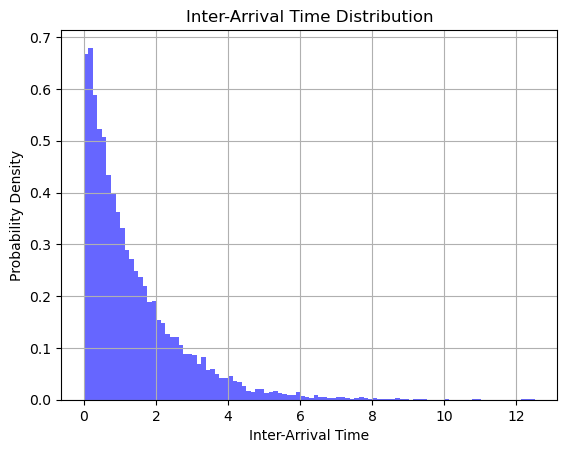

In [115]:
test_inter_arrival_times = genInitiationTime(inter_arrival_time_optimal)

# Plot histogram of inter-arrival times
plt.hist(test_inter_arrival_times, bins=100, density=True, alpha=0.6, color='b')
plt.xlabel('Inter-Arrival Time')
plt.ylabel('Probability Density')
plt.title('Inter-Arrival Time Distribution')
plt.grid(True)
plt.show()

As seen in our results, the mean and distribution of our data and our simulated data are similar

In [116]:
print("Data inter-arrival mean:",inter_arrival_times.mean())
print("Calculated inter-arrival mean:", test_inter_arrival_times.mean())

Data inter-arrival mean: 1.3698169264765245
Calculated inter-arrival mean: 1.3653059858969894


Retrieving the base stations from the dataset and drawing the histogram

In [80]:
baseStations = df["Base station "].values

<Axes: xlabel='Base station ', ylabel='Frequency'>

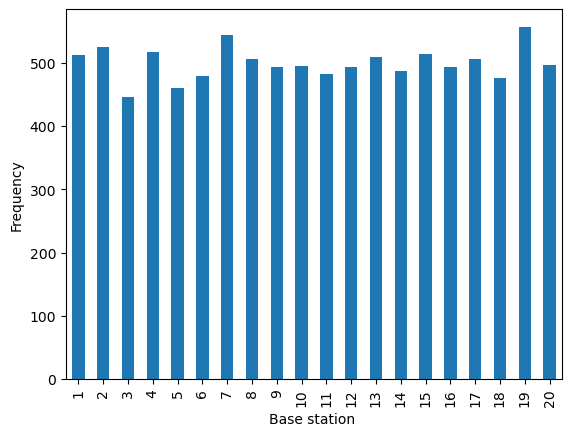

In [81]:
# Plot frequency bar graph for Base Stations Number
fig, ax = plt.subplots()
plt.ylabel("Frequency")
df["Base station "].value_counts().sort_index().plot(ax=ax, kind='bar')

As seen in our data, the distribution of the Base station is most likely a uniform distribution

Hence, we can generate the base stations using a pseudorandom function for random integers

<Axes: xlabel='Base station ', ylabel='Frequency'>

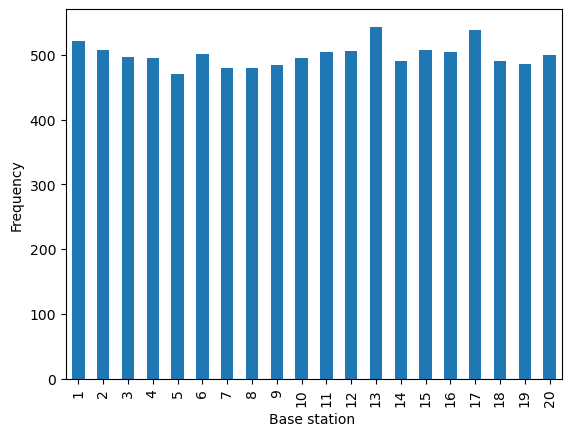

In [82]:
test_baseStations = genBaseStation()
test_baseStations = pd.DataFrame(columns=['Base station '], data=test_baseStations)
# Plot frequency bar graph for Base Stations Number
fig, ax = plt.subplots()
plt.ylabel("Frequency")
test_baseStations["Base station "].value_counts().sort_index().plot(ax=ax, kind='bar')

Retrieving the call duration (seconds) from the dataset

Converting the call duration to milliseconds and plotting the histogram

In [83]:
callDurationsSec = df["Call duration (sec)"].to_numpy()

In [84]:
callDurationsMS = callDurationsSec * 1000.0

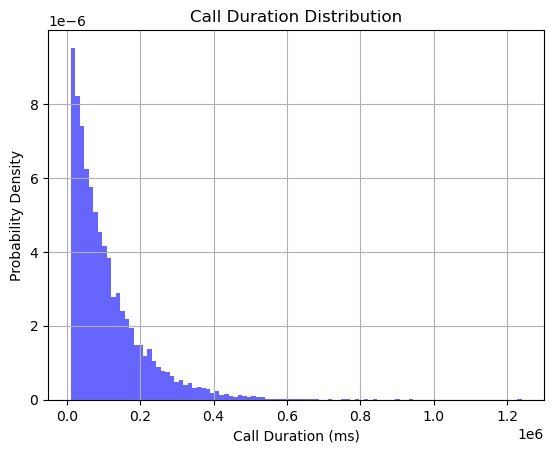

In [85]:
# Plot histogram of call durations
plt.hist(callDurationsMS, bins=100, density=True, alpha=0.6, color='b')
plt.xlabel('Call Duration (ms)')
plt.ylabel('Probability Density')
plt.title('Call Duration Distribution')
plt.grid(True)
plt.show()

As seen in the graph, the call duration is in an exponential distribution. Our MLE can be created using the function created to get the most optimal Lambda Value

In [117]:
test_callDurationsMS_optimal = callDurationsMS.mean()

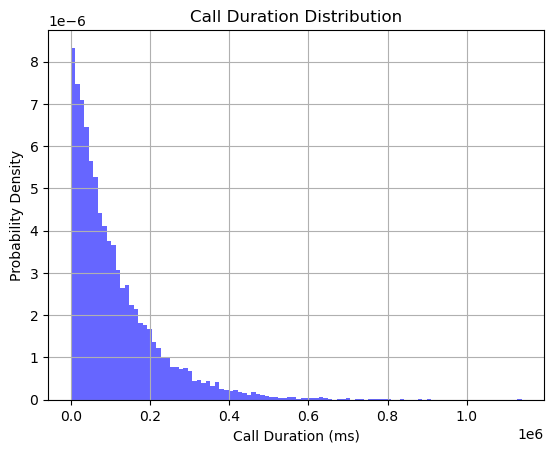

In [118]:
test_callDurationsMS = genCallDuration(test_callDurationsMS_optimal)

# Plot histogram of inter-arrival times
plt.hist(test_callDurationsMS, bins=100, density=True, alpha=0.6, color='b')
plt.xlabel('Call Duration (ms)')
plt.ylabel('Probability Density')
plt.title('Call Duration Distribution')
plt.grid(True)
plt.show()

We can see the similarities between the data and the simulated data. The distributions are the same and the values are close. The means of the two datasets can be seen below

In [119]:
print("Data mean:", callDurationsMS.mean())
print("Data 1/mean:", 1/(callDurationsMS.mean()))
print("Simulated Data mean:", test_callDurationsMS.mean())

Data mean: 109835.90073874769
Data 1/mean: 9.104491275385171e-06
Simulated Data mean: 110853.92525859812


Retrieving the velocity in km/h from the dataset

Converting the velocity to cm/ms and plotting the histogram

In [89]:
velocities = df["velocity (km/h)"].to_numpy()

In [90]:
velocitiesCMperMS = velocities / 1000.0 / 100.0 * 60.0 * 60.0

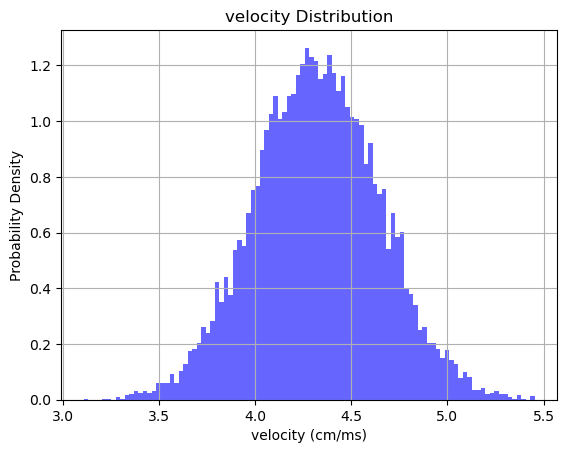

In [91]:
# Plot histogram of velocities(cm/ms) times
plt.hist(velocitiesCMperMS, bins=100, density=True, alpha=0.6, color='b')
plt.xlabel('velocity (cm/ms)')
plt.ylabel('Probability Density')   
plt.title('velocity Distribution')
plt.grid(True)
plt.show()

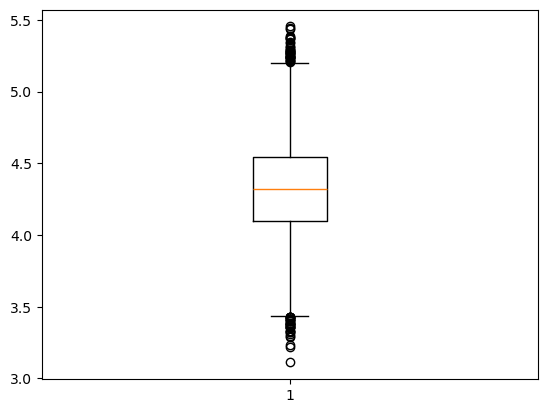

In [92]:
plt.boxplot(velocitiesCMperMS)
plt.show()

Our graph shows a normal distribution. To find the MLE, we'll use the Helper function to find the most optimal mean and variance for the distribution of our simulated data.

In [107]:
velocities_optimal_inputs = velocitiesCMperMS.mean(), velocitiesCMperMS.std()

In [111]:
test_velocitiesCMperMS = genCarVelocity(velocities_optimal_inputs[0], velocities_optimal_inputs[1])

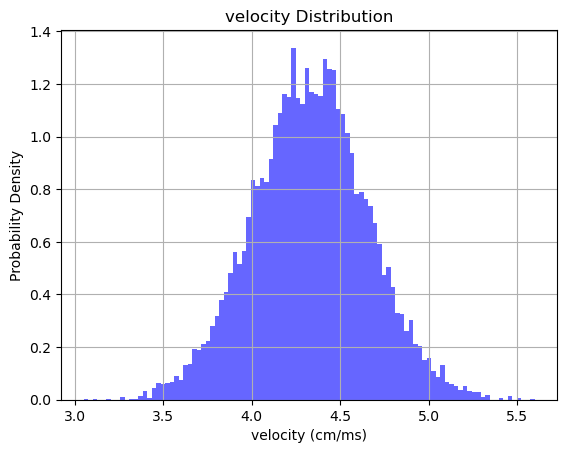

In [112]:
# Plot histogram of velocities(cm/ms) times
plt.hist(test_velocitiesCMperMS, bins=100, density=True, alpha=0.6, color='b')
plt.xlabel('velocity (cm/ms)')
plt.ylabel('Probability Density')   
plt.title('velocity Distribution')
plt.grid(True)
plt.show()

In [113]:
print("Data mean:", velocitiesCMperMS.mean())
print("Data variance:", velocitiesCMperMS.var())
print("Data std:", velocitiesCMperMS.std())

print("Simulated Data mean:", test_velocitiesCMperMS.mean())
print("Simulated Data variance:", test_velocitiesCMperMS.var())
print("Simulated Data std:", test_velocitiesCMperMS.std())

Data mean: 4.322595528606874
Data variance: 0.1054105112485041
Data std: 0.32466984961419515
Simulated Data mean: 4.330909739308995
Simulated Data variance: 0.10583402464756159
Simulated Data std: 0.3253214174436746
